# Preprocessing

As there are classes with not so many images, I augment data by extracting patches form each image. The patches are  dimensioned such that each image is divided in four non-overlapping patches with equal dimension. That means, that the number of images is augmented by a factor of four.

Furthermore I split the original images randomly in three folders, containing images for training, validation, and testing. These images are use for transfer learing.

## 1. Import packages and define class names

In [ ]:
import re
from os import listdir
from matplotlib import image
import matplotlib.pyplot as plt
%matplotlib inline
import splitfolders

In [2]:
class_names=['adenosis',
         'ductal_carcinoma',
         'fibroadenoma',
         'lobular_carcinoma',
         'mucinous_carcinoma',
         'papillary_carcinoma',
         'phyllodes_tumor',
         'tubular_adenoma']

## 2. Extract patches from each image

#### Dimension of patches

> 460 = 2 * 2 * 5 * 23  -> 2 * 5 * 23 = 230

> 700 = 2 * 2 * 5 * 5 * 7 -> 2 * 5 * 5 * 7 = 350

#### Extract image patches and save to image file

In [11]:
for idx, cn in enumerate(class_names):
    print(idx, cn)
    # load all images from each class directory
    for filename in listdir('data/breast/40X/'+cn):
        # load image
        img_data = image.imread('data/breast/40X/'+cn+'/'+filename)
        for i in range(2):
            for j in range(2):
                x1=i*230; x2=x1+230
                y1=j*350; y2=y1+350
                img_patch = img_data[x1:x2, y1:y2,:]
                fn_wo_ext = re.sub('(.*)\.png', '\\1', filename)
                # save image back to new directory
                image.imsave('data/breast/40Xpatches/'+cn+'/'+fn_wo_ext+'__patch_'+str(i)+'_'+str(j)+'.png', img_patch)

0 adenosis
1 ductal_carcinoma
2 fibroadenoma
3 lobular_carcinoma
4 mucinous_carcinoma
5 papillary_carcinoma
6 phyllodes_tumor
7 tubular_adenoma


## 3. Plot sample image and image patches

#### Load extracted image patches

In [3]:
for idx, cn in enumerate(class_names):
    # load all images from each class directory
    i=0
    for filename in listdir('data/breast/40Xpatches/'+cn):
        i+=1
    print(idx, 'class:', cn, 'number', i)

0 class: adenosis number 456
1 class: ductal_carcinoma number 3456
2 class: fibroadenoma number 1012
3 class: lobular_carcinoma number 624
4 class: mucinous_carcinoma number 820
5 class: papillary_carcinoma number 580
6 class: phyllodes_tumor number 436
7 class: tubular_adenoma number 596


#### Plot patches for one sample image

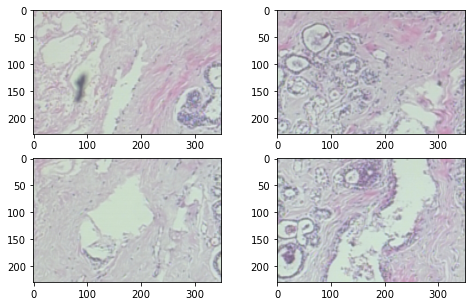

In [3]:
cn = class_names[0]
fn_wo_ext = 'SOB_B_A-14-22549AB-40-001'

fig, axs = plt.subplots(2,2, figsize=(8,5))
for i in range(2):
    for j in range(2):
        x1=i*230; x2=x1+230
        y1=j*350; y2=y1+350
        fn = 'data/breast/40Xpatches/'+cn+'/'+fn_wo_ext+'__patch_'+str(i)+'_'+str(j)+'.png'
        img_data = image.imread(fn)
        #a=img_data[x1:x2, y1:y2,:]
        #print(a.shape)
        axs[i,j].imshow(img_data)

#### Plot original image

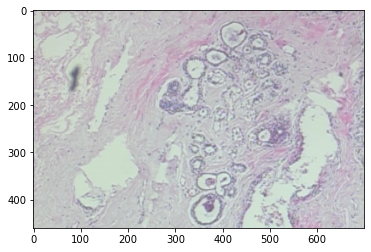

In [4]:
img_data_full = image.imread('data/breast/40X/'+cn+'/'+fn_wo_ext+'.png')
plt.imshow(img_data_full);

## 4. Split images in train, validation and test folders

https://stackoverflow.com/a/64006242

#### Split images in 80% for training, 10% for validation, and 10% for testing

In [7]:
splitfolders.ratio('data/breast/40X/', output='data/split/40X/', seed=777, ratio=(.8, 0.1,0.1)) 

Copying files: 1995 files [00:43, 46.26 files/s]


#### Check number of images for train, validation, and test

In [14]:
for tvt in ['train','val','test']:
    print(tvt)
    for idx, cn in enumerate(class_names):
        # load all images from each class directory
        i=0
        for filename in listdir('data/split/40X/'+tvt+'/'+cn):
            i+=1
        print(idx, 'class:', cn, ', number:', i)

train
0 class: adenosis , number: 91
1 class: ductal_carcinoma , number: 691
2 class: fibroadenoma , number: 202
3 class: lobular_carcinoma , number: 124
4 class: mucinous_carcinoma , number: 164
5 class: papillary_carcinoma , number: 116
6 class: phyllodes_tumor , number: 87
7 class: tubular_adenoma , number: 119
val
0 class: adenosis , number: 11
1 class: ductal_carcinoma , number: 86
2 class: fibroadenoma , number: 25
3 class: lobular_carcinoma , number: 15
4 class: mucinous_carcinoma , number: 20
5 class: papillary_carcinoma , number: 14
6 class: phyllodes_tumor , number: 10
7 class: tubular_adenoma , number: 14
test
0 class: adenosis , number: 12
1 class: ductal_carcinoma , number: 87
2 class: fibroadenoma , number: 26
3 class: lobular_carcinoma , number: 17
4 class: mucinous_carcinoma , number: 21
5 class: papillary_carcinoma , number: 15
6 class: phyllodes_tumor , number: 12
7 class: tubular_adenoma , number: 16
